In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

from scipy import stats
from scipy.stats import randint

from patsy import dmatrices


import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',85)

In [2]:
# Import dataframe

mat = pd.read_csv('student-mat.csv', sep=';')
por = pd.read_csv('student-por.csv', sep=';')
both = pd.merge(mat, por, how='outer', suffixes=['_mat','_por'], on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])

In [3]:
# Encoding dummy variables

def transform(col_list, df):
    for column in col_list:
        column_le = LabelEncoder()
        column_labels = column_le.fit_transform(df[column])
        df[column] = column_labels

In [4]:
# Transforming Categorical Data

mathematics = mat.copy()
portuguese = por.copy()

column_list = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 
               'higher', 'internet', 'romantic']

transform(column_list,mathematics)
transform(column_list,portuguese)

In [5]:
mathematics.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


In [6]:
portuguese.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13


**CORRELATION MATRIX**

In [7]:
# Correlation Matrix

mat_corr_matrix = mathematics.corr()
por_corr_matrix = portuguese.corr()

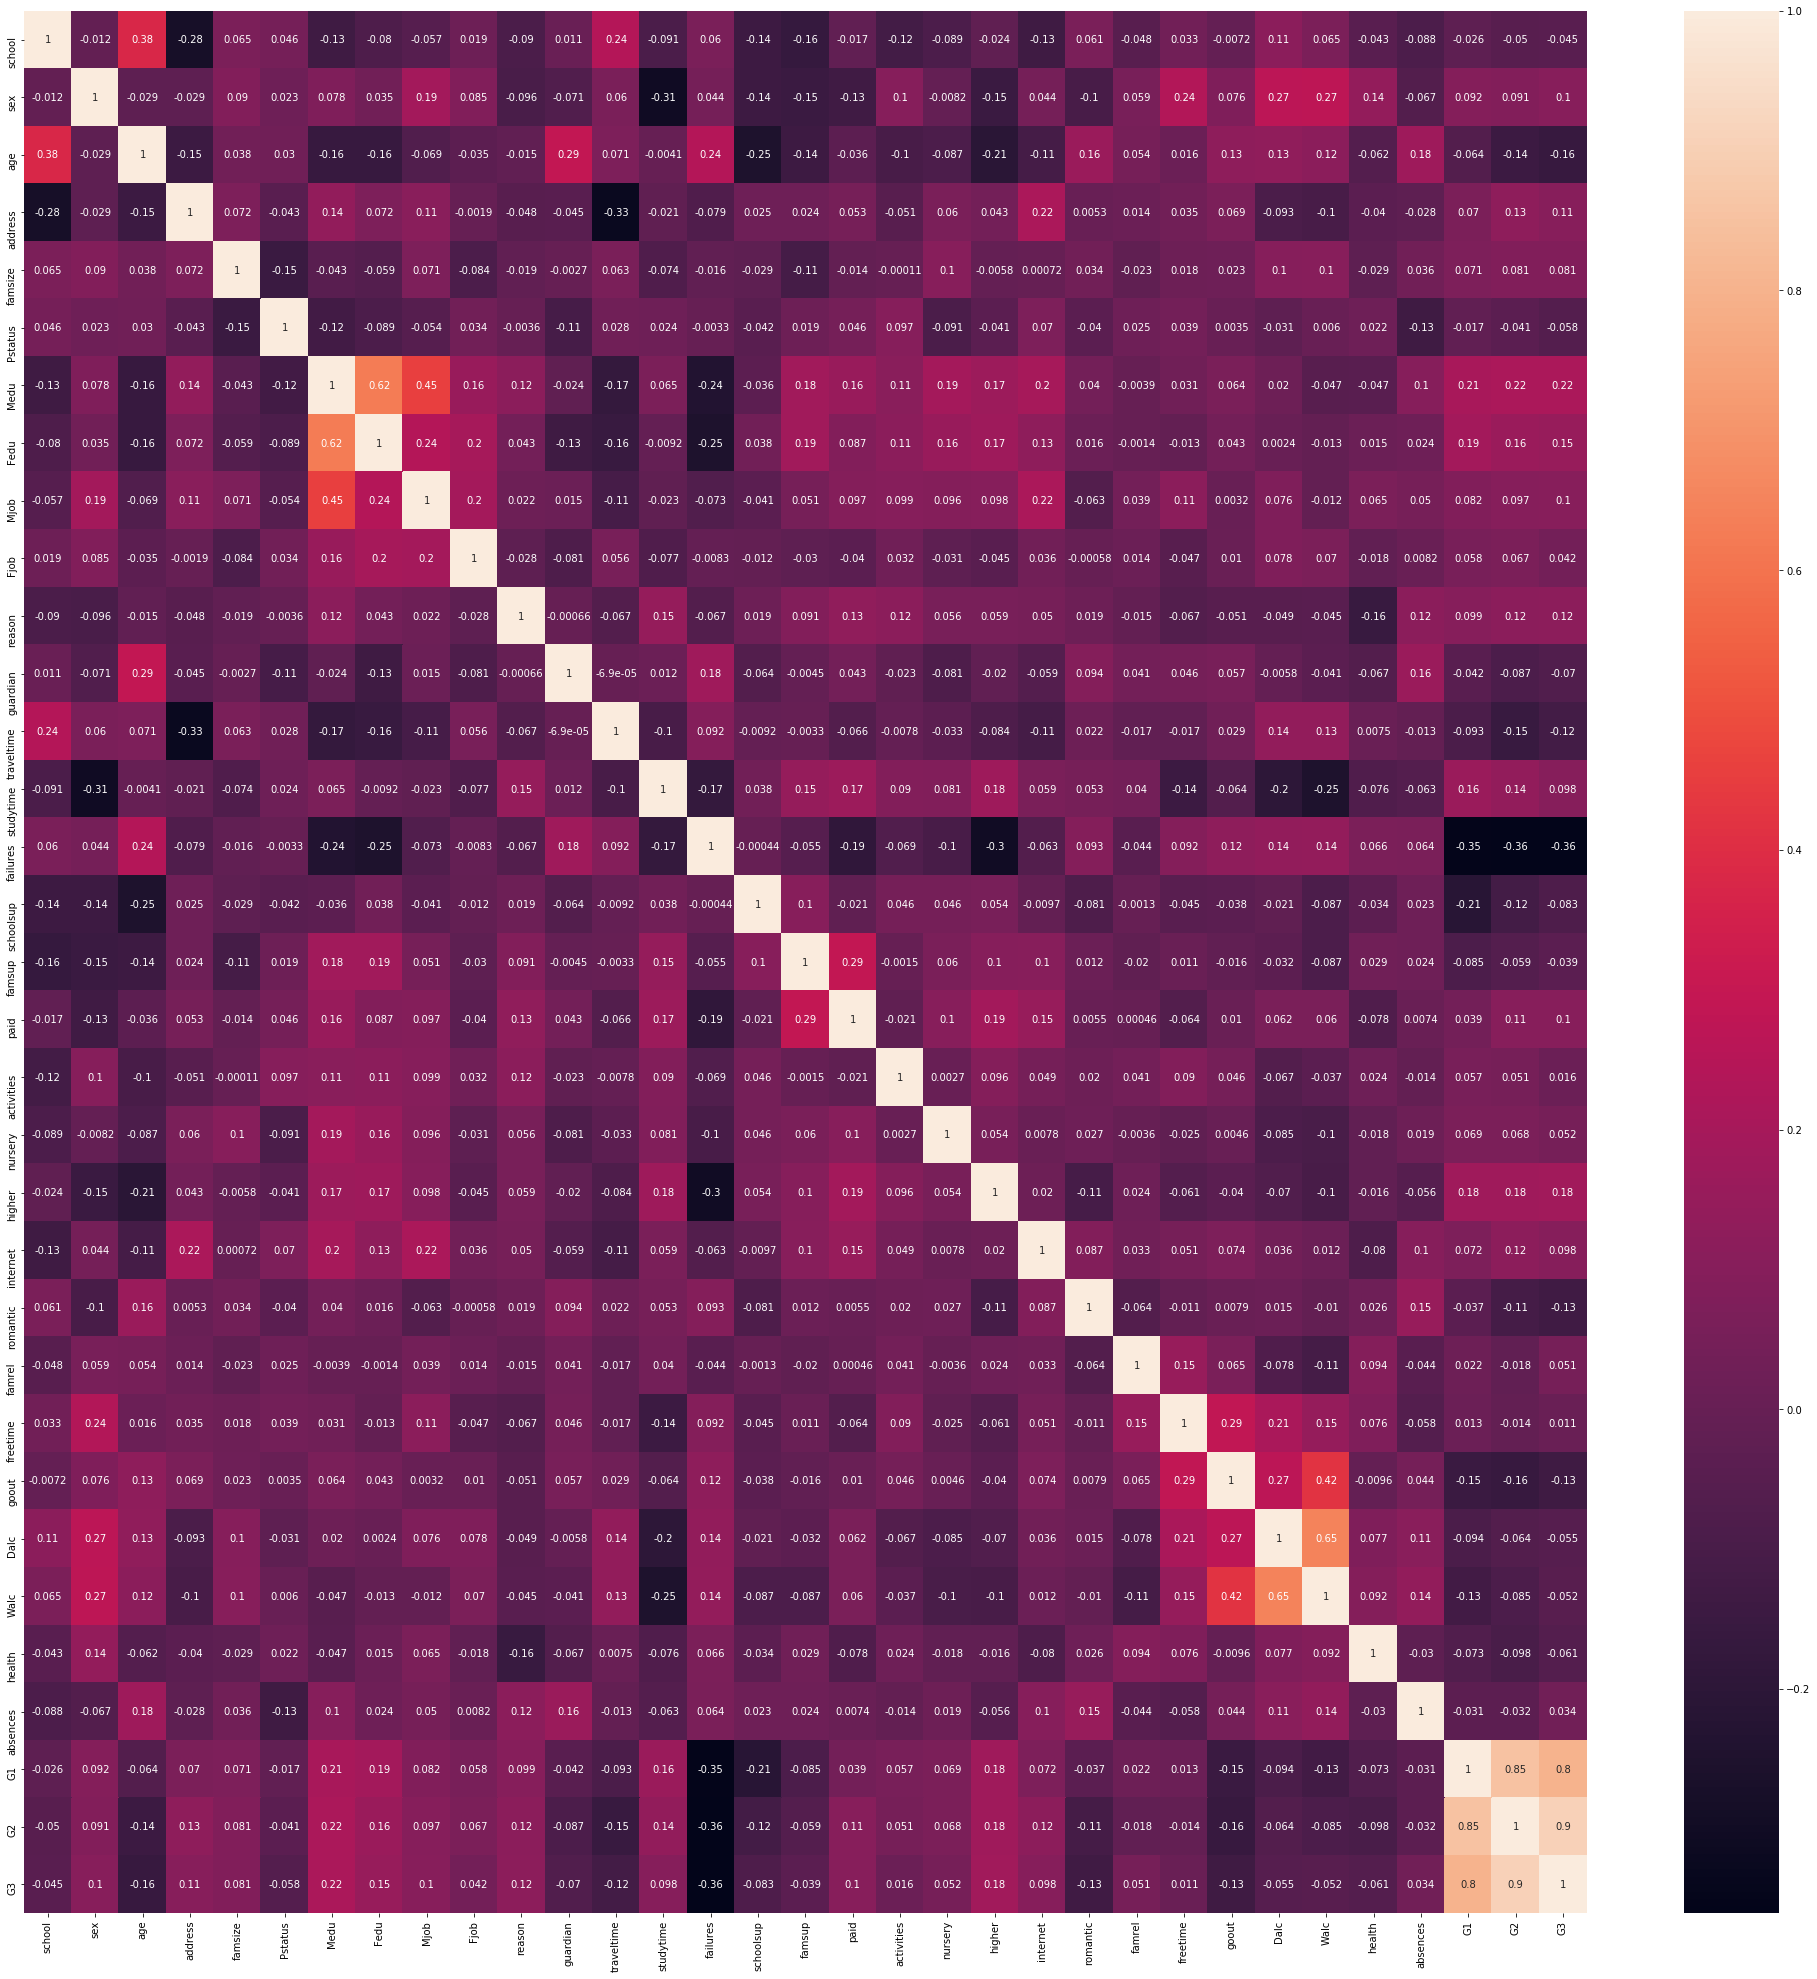

In [8]:
# Heatmap (Mathematics)

plt.figure(figsize=(35,35))
sns.heatmap(mat_corr_matrix, annot=True)
plt.savefig('Heatmap_mathematics.png')
plt.show()

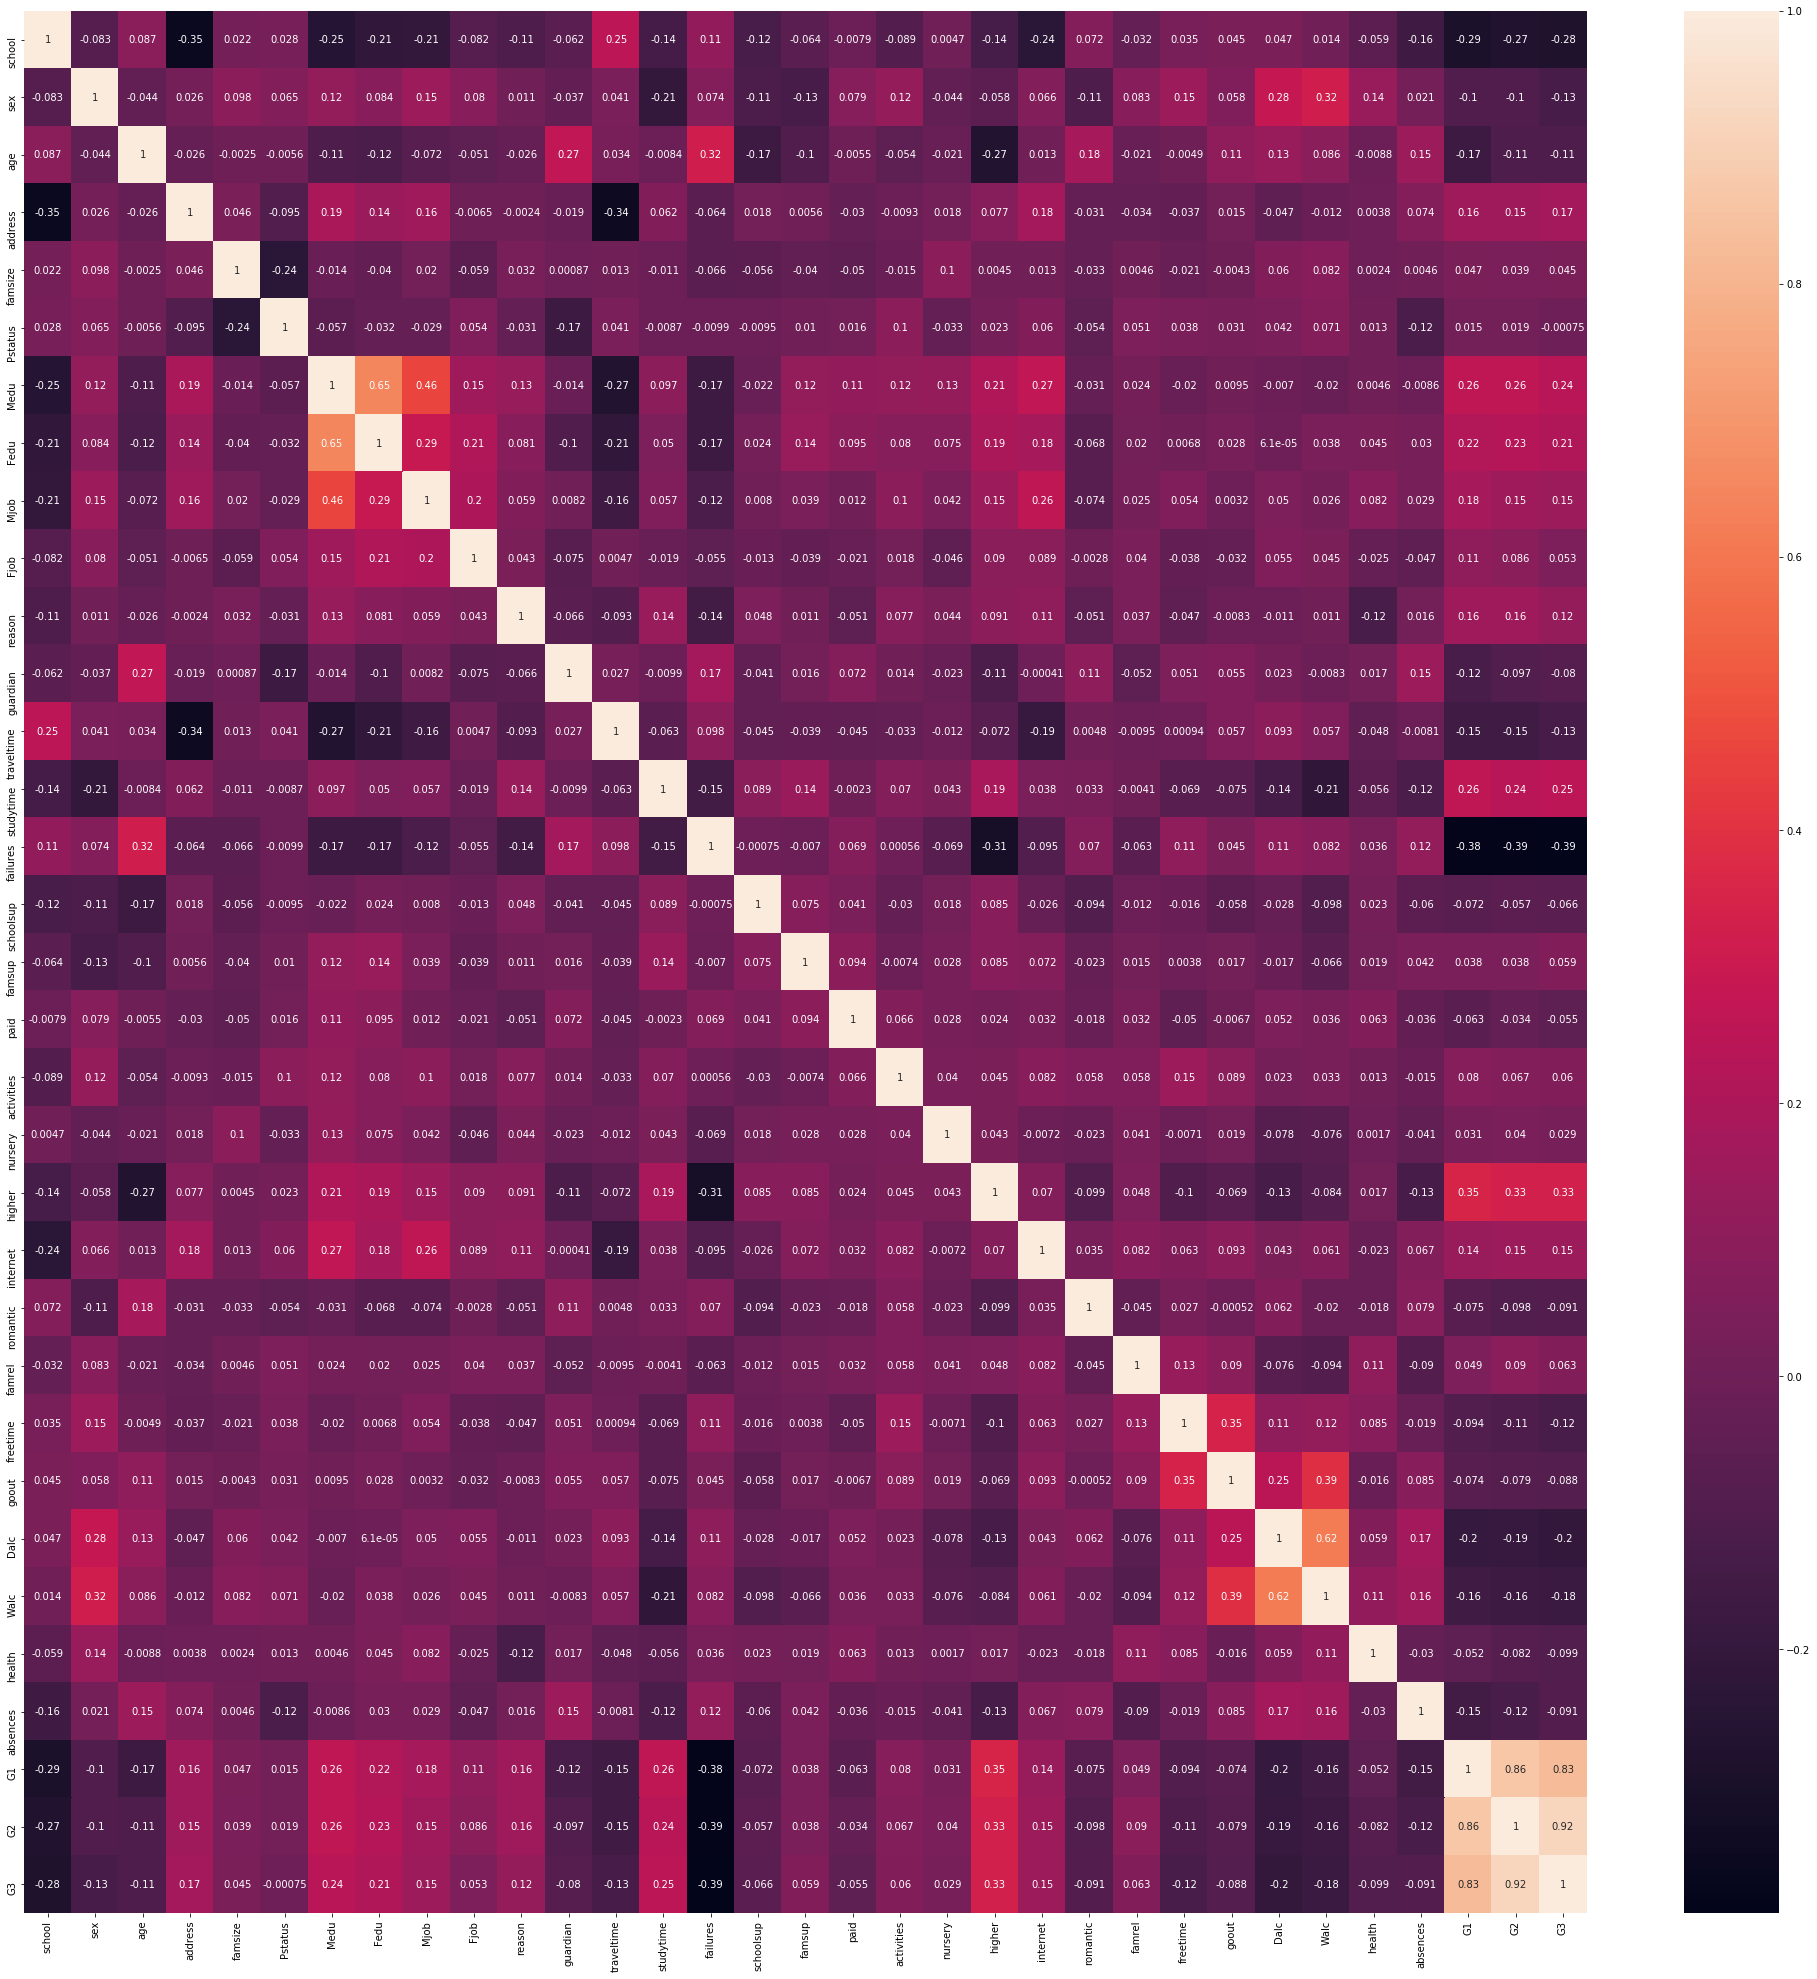

In [9]:
# Heatmap (Portuguese)

plt.figure(figsize=(35,35))
sns.heatmap(por_corr_matrix, annot=True)
plt.savefig('Heatmap_portuguese.png')
plt.show()

In [10]:
# Two-sample t-test (one-tailed test)
# Alpha = 0.5

def ttest_val(samp1, samp2, alpha=0.05, var=False):
    t_val, p_val = stats.ttest_ind(samp1, samp2, equal_var = var)
    if p_val < alpha:
        print('The p-value is {}'.format(str(p_val)))
        print('The means of two independent samples are different')
    else:
        print('The p-value is {}'.format(str(p_val)))
        print('The means of two independent samples are not different')

**GENDER**

In [11]:
# Gender (Mathematics)

gender_mat = mat.groupby('sex')
male_mat = gender_mat.get_group('M')
female_mat = gender_mat.get_group('F')

In [12]:
# T-test for the means of two independent samples
ttest_val(male_mat.G3, female_mat.G3)

The p-value is 0.03957700303089975
The means of two independent samples are different


In [13]:
# Gender (Portuguese)

gender_por = por.groupby('sex')
male_por = gender_por.get_group('M')
female_por = gender_por.get_group('F')

In [14]:
# T-test for the means of two independent samples
ttest_val(male_por.G3, female_por.G3)

The p-value is 0.001124565136044065
The means of two independent samples are different


**HIGHER EDUCATION**

In [15]:
# Want Higher Education (Mathematics)

edu_mat = mat.groupby('higher')
want_mat = edu_mat.get_group('yes')
notwant_mat = edu_mat.get_group('no')

In [16]:
# T-test for the means of two independent samples
ttest_val(want_mat.G3, notwant_mat.G3)

The p-value is 0.002440033985581924
The means of two independent samples are different


In [17]:
# Higher Education (Portuguese)

edu_por = por.groupby('higher')
want_por = edu_por.get_group('yes')
notwant_por = edu_por.get_group('no')

In [18]:
# T-test for the means of two independent samples
ttest_val(want_por.G3, notwant_por.G3)

The p-value is 2.323053826942577e-14
The means of two independent samples are different


**EXTRA EDUCATIONAL SUPPORT**

In [19]:
# Extra educational support (Mathematics)

schoolsup_mat = mat.groupby('schoolsup')
extra_mat = schoolsup_mat.get_group('yes')
noextra_mat = schoolsup_mat.get_group('no')

In [20]:
# T-test for the means of two independent samples
ttest_val(extra_mat.G3, noextra_mat.G3)

The p-value is 0.019741513383964297
The means of two independent samples are different


In [21]:
# Extra educational support (Portuguese)

schoolsup_por = por.groupby('schoolsup')
extra_por = schoolsup_por.get_group('yes')
noextra_por = schoolsup_por.get_group('no')

In [22]:
# T-test for the means of two independent samples
ttest_val(extra_por.G3, noextra_por.G3)

The p-value is 0.026753318027728595
The means of two independent samples are different


**TIME TO STUDY**

In [29]:
# Study time & final grade (Mathematics)

time_mat = mat.groupby('studytime')
time_m_1= time_mat.get_group(1)
time_m_4 = time_mat.get_group(4)

In [30]:
# T-test for the means of two independent samples
ttest_val(time_m_4.G3,time_m_1.G3)

The p-value is 0.2884111039246912
The means of two independent samples are not different


In [31]:
# Study time & final grade (Portuguese)

time_por = por.groupby('studytime')
time_p_1= time_por.get_group(1)
time_p_4 = time_por.get_group(4)

In [32]:
# T-test for the means of two independent samples
ttest_val(time_p_4.G3,time_p_1.G3)

The p-value is 0.0002518982800438785
The means of two independent samples are different


**HEALTH**

In [33]:
# Health & Final Grade (Mathematics)

health_mat = mat.groupby('health')
health_m_1= health_mat.get_group(1)
health_m_5 = health_mat.get_group(5)

In [34]:
# T-test for the means of two independent samples
ttest_val(health_m_1.G3,health_m_5.G3)

The p-value is 0.047457425897852915
The means of two independent samples are different


In [35]:
# Health & Final Grade (Portuguese)

health_port = por.groupby('health')
health_p_1= health_port.get_group(1)
health_p_5 = health_port.get_group(5)

In [36]:
# T-test for the means of two independent samples
ttest_val(health_p_1.G3,health_p_5.G3)

The p-value is 0.013337161033274028
The means of two independent samples are different
